In [2]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter

# H Gate

In [3]:
h_dddqn = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv"
)
h_dddqn_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_H_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv"
)
h_dppo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_PPO_pulse_Discrete.csv"
)
h_dppo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_H_hamiltonian_Field_agent_PPO_pulse_Discrete.csv"
)

h_cppo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_PPO_pulse_Continuous.csv"
)

h_cppo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_H_hamiltonian_Field_agent_PPO_pulse_Continuous.csv"
)

h_dgrpo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_GP_pulse_Discrete.csv"
)

h_dgrpo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_H_hamiltonian_Field_agent_GP_pulse_Discrete.csv"
)

h_cgrpo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_GP_pulse_Continuous.csv"
)

h_cgrpo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_H_hamiltonian_Field_agent_GP_pulse_Continuous.csv"
)

h_td3 = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_TD3_pulse_Continuous.csv"
)

h_td3_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_H_hamiltonian_Field_agent_TD3_pulse_Continuous.csv"
)

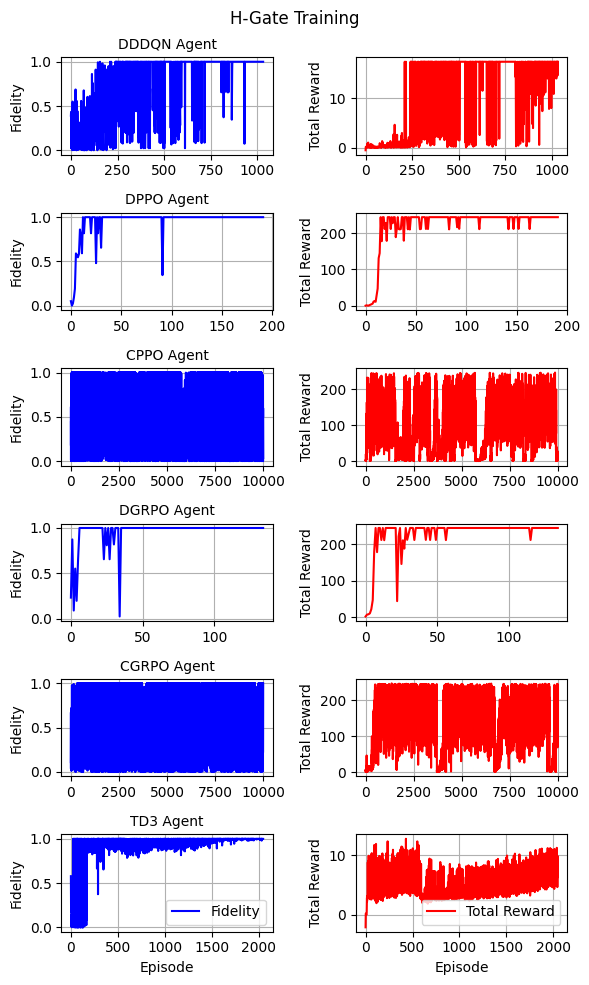

In [4]:
plt.figure(figsize=(6, 10))
plt.suptitle('H-Gate Training', fontsize=12)
plt.subplot(6, 2, 1)
plt.title("DDDQN Agent", fontsize=10)
plt.plot(h_dddqn["episode"], h_dddqn["fidelity"], color="blue", label="Fidelity")
plt.ylabel("Fidelity")
plt.grid()
plt.subplot(6, 2, 2)
plt.plot(h_dddqn["episode"], h_dddqn["total_reward"], color="red", label="Total Reward")
plt.ylabel("Total Reward")
plt.grid()
plt.subplot(6, 2, 3)
plt.title("DPPO Agent", fontsize=10)
plt.plot(h_dppo["episode"], h_dppo["fidelity"], color="blue", label="Fidelity")
plt.ylabel("Fidelity")
plt.grid()
plt.subplot(6, 2, 4)
plt.plot(h_dppo["episode"], h_dppo["total_reward"], color="red", label="Total Reward")
plt.ylabel("Total Reward")
plt.grid()
plt.subplot(6, 2, 5)
plt.title("CPPO Agent", fontsize=10)
plt.plot(h_cppo["episode"], h_cppo["fidelity"], color="blue", label="Fidelity")
plt.ylabel("Fidelity")
plt.grid()
plt.subplot(6, 2, 6)
plt.plot(h_cppo["episode"], h_cppo["total_reward"], color="red", label="Total Reward")
plt.ylabel("Total Reward")
plt.grid()
plt.subplot(6, 2, 7)
plt.title("DGRPO Agent", fontsize=10)
plt.plot(h_dgrpo["episode"], h_dgrpo["fidelity"], color="blue", label="Fidelity")
plt.ylabel("Fidelity")
plt.grid()
plt.subplot(6, 2, 8)
plt.plot(h_dgrpo["episode"], h_dgrpo["total_reward"], color="red", label="Total Reward")
plt.ylabel("Total Reward")
plt.grid()
plt.subplot(6, 2, 9)
plt.title("CGRPO Agent", fontsize=10)
plt.plot(h_cgrpo["episode"], h_cgrpo["fidelity"], color="blue", label="Fidelity")
plt.ylabel("Fidelity")
plt.grid()
plt.subplot(6, 2, 10)
plt.plot(h_cgrpo["episode"], h_cgrpo["total_reward"], color="red", label="Total Reward")
plt.ylabel("Total Reward")
plt.grid()
plt.subplot(6, 2, 11)
plt.title("TD3 Agent", fontsize=10)
plt.plot(h_td3["episode"], h_td3["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(6, 2, 12)
plt.plot(h_td3["episode"], h_td3["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Fidelity_Reward_All.png", dpi=300
)
plt.show()

In [5]:
# get the 100 rolling mean of log_infidelity, for the first 100 put 0
h_dddqn["log_infidelity_100"] = h_dddqn["log_infidelity"].rolling(100).mean()
h_dddqn["log_infidelity_100"] = h_dddqn["log_infidelity_100"].fillna(0)

h_dppo["log_infidelity_100"] = h_dppo["log_infidelity"].rolling(100).mean()
h_dppo["log_infidelity_100"] = h_dppo["log_infidelity_100"].fillna(0)

h_cppo["log_infidelity_100"] = h_cppo["log_infidelity"].rolling(100).mean()
h_cppo["log_infidelity_100"] = h_cppo["log_infidelity_100"].fillna(0)

h_dgrpo["log_infidelity_100"] = h_dgrpo["log_infidelity"].rolling(100).mean()
h_dgrpo["log_infidelity_100"] = h_dgrpo["log_infidelity_100"].fillna(0)

h_cgrpo["log_infidelity_100"] = h_cgrpo["log_infidelity"].rolling(100).mean()
h_cgrpo["log_infidelity_100"] = h_cgrpo["log_infidelity_100"].fillna(0)

h_td3["log_infidelity_100"] = h_td3["log_infidelity"].rolling(100).mean()
h_td3["log_infidelity_100"] = h_td3["log_infidelity_100"].fillna(0)

In [6]:
# Extract the max fidelity, log_infidelity and avg_fidelity of every agent for the H gate nad put them in a dataframe
h_max = pd.DataFrame(
    {
        "Agent": ["DDDQN", "DPPO", "CPPO", "DGRPO", "CGRPO", "TD3"],
        "Max Fidelity": [
            h_dddqn["fidelity"].max(),
            h_dppo["fidelity"].max(),
            h_cppo["fidelity"].max(),
            h_dgrpo["fidelity"].max(),
            h_cgrpo["fidelity"].max(),
            h_td3["fidelity"].max(),
        ],
        "Max Log Infidelity": [
            h_dddqn["log_infidelity"].max(),
            h_dppo["log_infidelity"].max(),
            h_cppo["log_infidelity"].max(),
            h_dgrpo["log_infidelity"].max(),
            h_cgrpo["log_infidelity"].max(),
            h_td3["log_infidelity"].max(),
        ],
        "Avg Fidelity": [
            h_dddqn["avg_fidelity"].max(),
            h_dppo["avg_fidelity"].max(),
            h_cppo["avg_fidelity"].max(),
            h_dgrpo["avg_fidelity"].max(),
            h_cgrpo["avg_fidelity"].max(),
            h_td3["avg_fidelity"].max(),
        ],
        "Time Steps": [
            h_dddqn["time_step"][h_dddqn["fidelity"].idxmax()],
            h_dppo["time_step"][h_dppo["fidelity"].idxmax()],
            h_cppo["time_step"][h_cppo["fidelity"].idxmax()],
            h_dgrpo["time_step"][h_dgrpo["fidelity"].idxmax()],
            h_cgrpo["time_step"][h_cgrpo["fidelity"].idxmax()],
            h_td3["time_step"][h_td3["fidelity"].idxmax()],
        ],
    }
)
styled_df = h_max.style.background_gradient(
    cmap="inferno", subset=["Max Fidelity", "Max Log Infidelity", "Avg Fidelity"]
)
h_max_sorted = h_max.sort_values(by="Max Log Infidelity", ascending=True)
h_max_sorted.to_latex("/home/pdconte/Desktop/DUTh_Thesis/Tables/H_Gate_Max_Values.tex")
h_max_sorted

,Agent,Max Fidelity,Max Log Infidelity,Avg Fidelity,Time Steps
5,TD3,0.99999,5.005089,0.999993,10
1,DPPO,1.00000,6.516003,1.000000,5
3,DGRPO,1.00000,6.516003,1.000000,5
0,DDDQN,1.00000,6.516003,1.000000,7
2,CPPO,1.00000,7.395267,1.000000,5
4,CGRPO,1.00000,7.650909,1.000000,5


In [7]:
t_max_h_dddqn = f"{h_dddqn['fidelity'].idxmax()}"
t_max_h_dppo = f"{h_dppo['fidelity'].idxmax()}"
t_max_h_cppo = f"{h_cppo['fidelity'].idxmax()}"
t_max_h_dgrpo = f"{h_dgrpo['fidelity'].idxmax()}"
t_max_h_cgrpo = f"{h_cgrpo['fidelity'].idxmax()}"
t_max_h_td3 = f"{h_td3['fidelity'].idxmax()}"
h_log_inf_ep_dddqn_max = pd.DataFrame(
    ast.literal_eval(h_dddqn_trajectories[t_max_h_dddqn][3])
)
h_log_inf_ep_dppo_max = pd.DataFrame(ast.literal_eval(h_dppo_trajectories[t_max_h_dppo][3]))
h_log_inf_ep_cppo_max = pd.DataFrame(ast.literal_eval(h_cppo_trajectories[t_max_h_cppo][3]))
h_log_inf_ep_dgrpo_max = pd.DataFrame(
    ast.literal_eval(h_dgrpo_trajectories[t_max_h_dgrpo][3])
)
h_log_inf_ep_cgrpo_max = pd.DataFrame(
    ast.literal_eval(h_cgrpo_trajectories[t_max_h_cgrpo][3])
)
h_log_inf_ep_td3_max = pd.DataFrame(ast.literal_eval(h_td3_trajectories[t_max_h_td3][3]))

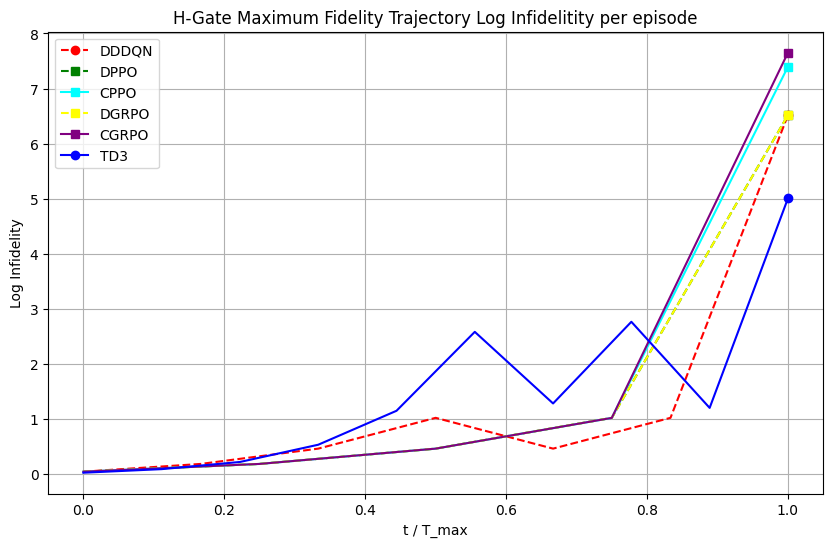

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(
    np.linspace(0, 1, len(h_log_inf_ep_dddqn_max)),
    h_log_inf_ep_dddqn_max,
    label="DDDQN",
    color="red",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(h_log_inf_ep_dppo_max)),
    h_log_inf_ep_dppo_max,
    label="DPPO",
    color="green",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(h_log_inf_ep_cppo_max)),
    h_log_inf_ep_cppo_max,
    label="CPPO",
    color="cyan",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(h_log_inf_ep_dgrpo_max)),
    h_log_inf_ep_dgrpo_max,
    label="DGRPO",
    color="yellow",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(h_log_inf_ep_cgrpo_max)),
    h_log_inf_ep_cgrpo_max,
    label="CGRPO",
    color="purple",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(h_log_inf_ep_td3_max)),
    h_log_inf_ep_td3_max,
    label="TD3",
    color="blue",
    marker="o",
    markevery=[-1],
)
plt.xlabel(f"t / T_max")
plt.ylabel("Log Infidelity")
plt.title("H-Gate Maximum Fidelity Trajectory Log Infidelitity per episode")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Max_Fidelity_Trajectory_Log_Infidelity.png",
)
plt.show()

In [9]:
def _normalize_array(array, label):
    max_val = np.max(np.abs(array))
    if max_val == 0:
        return np.zeros_like(array)
    return array / max_val


def _smooth_array(array, method="none", t_normalized=None, **kwargs):
    if method == "moving_average":
        window_size = kwargs.get("window_size", 5)
        return np.convolve(array, np.ones(window_size) / window_size, mode="same")
    elif method == "gaussian":
        sigma = kwargs.get("sigma", 2)
        return gaussian_filter1d(array, sigma=sigma)
    elif method == "savitzky_golay":
        window_length = kwargs.get("window_length", 9)
        polyorder = kwargs.get("polyorder", 3)
        return savgol_filter(array, window_length=window_length, polyorder=polyorder)
    elif method == "cubic_spline" and t_normalized is not None:
        t_smooth = np.linspace(0, 1, 500)
        spline = CubicSpline(t_normalized, array)
        return spline(t_smooth), t_smooth
    return array


# Single-Qubit Plot
def plot_control_pulse(
    rabi,
    detuning,
    gate,
    agent_type,
    smoothing_method="none",
    pulse="min",
    **kwargs,
):
    # Ensure input arrays are compatible
    assert len(rabi) == len(
        detuning
    ), "Rabi and detuning arrays must have the same length."

    num_steps = len(rabi)
    t_normalized = np.linspace(0, 1, num_steps)

    # Normalize Rabi and Detuning
    rabi_normalized = _normalize_array(rabi, "Rabi")
    detuning_normalized = _normalize_array(detuning, "Detuning")

    # Apply smoothing
    if smoothing_method == "cubic_spline":
        rabi_normalized, t_normalized = _smooth_array(
            rabi_normalized, smoothing_method, t_normalized, **kwargs
        )
        detuning_normalized, t_normalized = _smooth_array(
            detuning_normalized, smoothing_method, t_normalized, **kwargs
        )
    else:
        rabi_normalized = _smooth_array(rabi_normalized, smoothing_method, **kwargs)
        detuning_normalized = _smooth_array(
            detuning_normalized, smoothing_method, **kwargs
        )

    # Plot
    plt.plot(
        t_normalized,
        rabi_normalized,
        label=r"$\frac{\mathrm{\Omega}}{\mathrm{\Omega}_{\mathrm{max}}}$",
        color="blue",
        linestyle="--",
        drawstyle="steps-post",
        marker="o",
    )
    
    plt.plot(
        t_normalized,
        detuning_normalized,
        label=r"$\frac{\Delta}{\Delta_{\mathrm{max}}}$",
        color="red",
        linestyle="--",
        drawstyle="steps-post",
        marker="o",
    )
    plt.ylim(-1.1, 1.1)
    plt.title(f"{agent_type}", fontsize=10)
    # plt.legend(fontsize=10)
    plt.grid(True)
    # if pulse == 'min':
    #     plt.savefig(
    #         f"/home/pdconte/Desktop/DUTh_Thesis/Plots/{gate}_Gate_Control_{agent_type}_min.png", dpi=300)
    # else:
    #     plt.savefig(
    #         f"/home/pdconte/Desktop/DUTh_Thesis/Plots/{gate}_Gate_Control_{agent_type}_max.png", dpi=300)

In [10]:
# Apply the function to the column
h_dddqn_pulse_max =  ast.literal_eval(h_dddqn_trajectories[t_max_h_dddqn][6])
h_dddqn_pulse_max = {
    "omega": [d["omega"] for d in h_dddqn_pulse_max],
    "delta": [d["delta"] for d in h_dddqn_pulse_max],
}

In [11]:
h_dppo_pulse_max = ast.literal_eval(h_dppo_trajectories[t_max_h_dppo][6])
h_dppo_pulse_max = {
    "omega": [d["omega"] for d in h_dppo_pulse_max],
    "delta": [d["delta"] for d in h_dppo_pulse_max],
}

In [12]:
h_cppo_pulse_max = ast.literal_eval(h_cppo_trajectories[t_max_h_cppo][6])
h_cppo_pulse_max = {
    "omega": [d["omega"] for d in h_cppo_pulse_max],
    "delta": [d["delta"] for d in h_cppo_pulse_max],
}

In [13]:
h_dgrpo_pulse_max = ast.literal_eval(h_dgrpo_trajectories[t_max_h_dgrpo][6])
h_dgrpo_pulse_max = {
    "omega": [d["omega"] for d in h_dgrpo_pulse_max],
    "delta": [d["delta"] for d in h_dgrpo_pulse_max],
}

In [14]:
h_cgrpo_pulse_max = ast.literal_eval(h_cgrpo_trajectories[t_max_h_cgrpo][6])
h_cgrpo_pulse_max = {
    "omega": [d["omega"] for d in h_cgrpo_pulse_max],
    "delta": [d["delta"] for d in h_cgrpo_pulse_max],
}

In [15]:
h_td3_pulse_max = ast.literal_eval(h_cgrpo_trajectories[t_max_h_td3][6])
h_td3_pulse_max = {
    "omega": [d["omega"] for d in h_td3_pulse_max],
    "delta": [d["delta"] for d in h_td3_pulse_max],
}

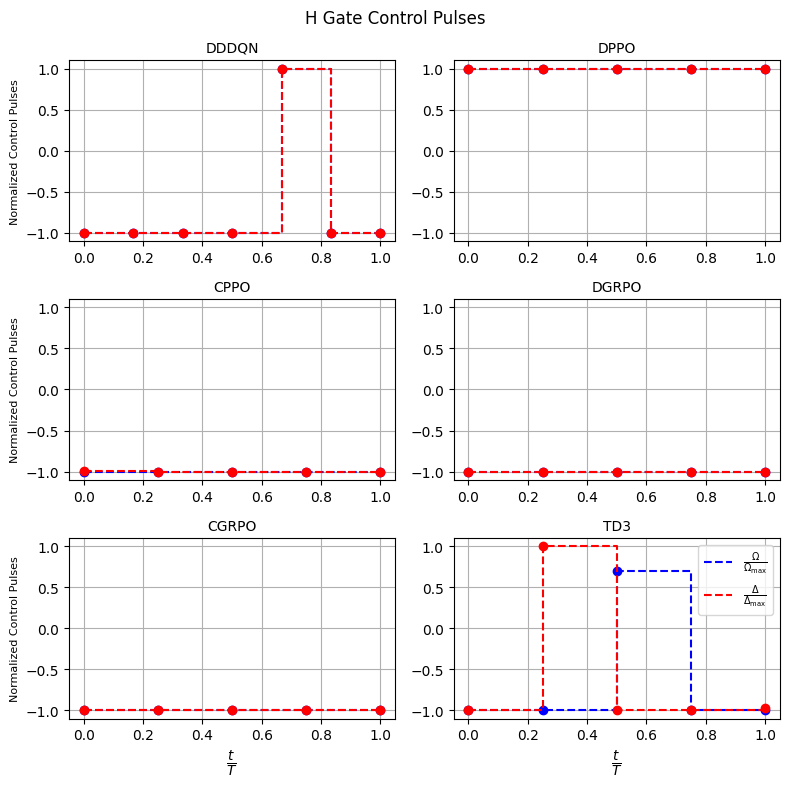

In [16]:
plt.figure(figsize=(8, 8))
plt.subplot(3, 2, 1)
plt.suptitle('H Gate Control Pulses')
plot_control_pulse(
    h_dddqn_pulse_max["omega"],
    h_dddqn_pulse_max["delta"],
    "H",
    "DDDQN",
    smoothing_method="none",
    pulse="max",
)
plt.ylabel("Normalized Control Pulses", fontsize=8)
plt.subplot(3, 2, 2)
plot_control_pulse(
    h_dppo_pulse_max["omega"],
    h_dppo_pulse_max["delta"],
    "H",
    "DPPO",
    smoothing_method="none",
    pulse="max",
)
plt.subplot(3, 2, 3)
plot_control_pulse(
    h_cppo_pulse_max["omega"],
    h_cppo_pulse_max["delta"],
    "H",
    "CPPO",
    smoothing_method="none",
    pulse="max",
)
plt.ylabel("Normalized Control Pulses", fontsize=8)
plt.subplot(3, 2, 4)
plot_control_pulse(
    h_dgrpo_pulse_max["omega"],
    h_dgrpo_pulse_max["delta"],
    "H",
    "DGRPO",
    smoothing_method="none",
    pulse="max",
)
plt.subplot(3, 2, 5)
plot_control_pulse(
    h_cgrpo_pulse_max["omega"],
    h_cgrpo_pulse_max["delta"],
    "H",
    "CGRPO",
    smoothing_method="none",
    pulse="max",
)
plt.ylabel("Normalized Control Pulses", fontsize=8)
plt.xlabel(r"$\frac{t}{T}$", fontsize=14)
plt.subplot(3, 2, 6)
plot_control_pulse(
    h_td3_pulse_max["omega"],
    h_td3_pulse_max["delta"],
    "H",
    "TD3",
    smoothing_method="none",
    pulse="max",
)
omega_line = mlines.Line2D(
    [],
    [],
    color="blue",
    linestyle="--",
    label=r"$\frac{\Omega}{\Omega_{\mathrm{max}}}$",
)
delta_line = mlines.Line2D(
    [],
    [],
    color="red",
    linestyle="--",
    label=r"$\frac{\Delta}{\Delta_{\mathrm{max}}}$",
)
plt.xlabel(r"$\frac{t}{T}$", fontsize=14)
plt.legend(handles=[omega_line, delta_line], fontsize=10)
plt.tight_layout()
plt.savefig(
    f"/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Control_Pulses_All.png",
    dpi=300,
)

# T-Gate

In [17]:
# import the same for T as H
t_dddqn = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv"
)
t_dddqn_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_T_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv"
)
t_dppo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_PPO_pulse_Discrete.csv"
)

t_dppo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_T_hamiltonian_Field_agent_PPO_pulse_Discrete.csv"
)

t_cppo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_PPO_pulse_Continuous.csv"
)

t_cppo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_T_hamiltonian_Field_agent_PPO_pulse_Continuous.csv"
)

t_dgrpo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_GP_pulse_Discrete.csv"
)

t_dgrpo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_T_hamiltonian_Field_agent_GP_pulse_Discrete.csv"
)

t_cgrpo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_GP_pulse_Continuous.csv"
)

t_cgrpo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_T_hamiltonian_Field_agent_GP_pulse_Continuous.csv"
)

t_td3 = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_TD3_pulse_Continuous.csv"
)

t_td3_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_T_hamiltonian_Field_agent_TD3_pulse_Continuous.csv"
)

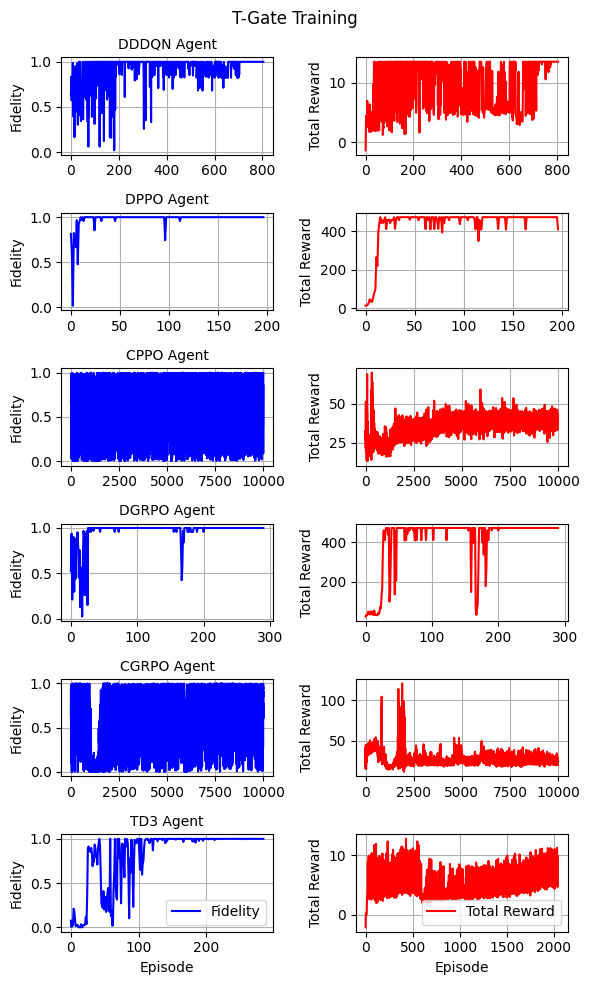

In [18]:
plt.figure(figsize=(6, 10))
plt.suptitle("T-Gate Training", fontsize=12)
plt.subplot(6, 2, 1)
plt.title("DDDQN Agent", fontsize=10)
plt.plot(t_dddqn["episode"], t_dddqn["fidelity"], color="blue", label="Fidelity")
plt.ylabel("Fidelity")
plt.grid()
plt.subplot(6, 2, 2)
plt.plot(t_dddqn["episode"], t_dddqn["total_reward"], color="red", label="Total Reward")
plt.ylabel("Total Reward")
plt.grid()
plt.subplot(6, 2, 3)
plt.title("DPPO Agent", fontsize=10)
plt.plot(t_dppo["episode"], t_dppo["fidelity"], color="blue", label="Fidelity")
plt.ylabel("Fidelity")
plt.grid()
plt.subplot(6, 2, 4)
plt.plot(t_dppo["episode"], t_dppo["total_reward"], color="red", label="Total Reward")
plt.ylabel("Total Reward")
plt.grid()
plt.subplot(6, 2, 5)
plt.title("CPPO Agent", fontsize=10)
plt.plot(t_cppo["episode"], t_cppo["fidelity"], color="blue", label="Fidelity")
plt.ylabel("Fidelity")
plt.grid()
plt.subplot(6, 2, 6)
plt.plot(t_cppo["episode"], t_cppo["total_reward"], color="red", label="Total Reward")
plt.ylabel("Total Reward")
plt.grid()
plt.subplot(6, 2, 7)
plt.title("DGRPO Agent", fontsize=10)
plt.plot(t_dgrpo["episode"], t_dgrpo["fidelity"], color="blue", label="Fidelity")
plt.ylabel("Fidelity")
plt.grid()
plt.subplot(6, 2, 8)
plt.plot(t_dgrpo["episode"], t_dgrpo["total_reward"], color="red", label="Total Reward")
plt.ylabel("Total Reward")
plt.grid()
plt.subplot(6, 2, 9)
plt.title("CGRPO Agent", fontsize=10)
plt.plot(t_cgrpo["episode"], t_cgrpo["fidelity"], color="blue", label="Fidelity")
plt.ylabel("Fidelity")
plt.grid()
plt.subplot(6, 2, 10)
plt.plot(t_cgrpo["episode"], t_cgrpo["total_reward"], color="red", label="Total Reward")
plt.ylabel("Total Reward")
plt.grid()
plt.subplot(6, 2, 11)
plt.title("TD3 Agent", fontsize=10)
plt.plot(t_td3["episode"], t_td3["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(6, 2, 12)
plt.plot(h_td3["episode"], h_td3["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Fidelity_Reward_All.png", dpi=300
)
plt.show()

In [19]:
t_max = pd.DataFrame(
    {
        "Agent": ["DDDQN", "PPO-D", "PPO-C", "GRPO-D", "GRPO-C", "TD3"],
        "Max Fidelity": [
            t_dddqn["fidelity"].max(),
            t_dppo["fidelity"].max(),
            t_cppo["fidelity"].max(),
            t_dgrpo["fidelity"].max(),
            t_cgrpo["fidelity"].max(),
            t_td3["fidelity"].max(),
        ],
        "Max Log Infidelity": [
            t_dddqn["log_infidelity"].max(),
            t_dppo["log_infidelity"].max(),
            t_cppo["log_infidelity"].max(),
            t_dgrpo["log_infidelity"].max(),
            t_cgrpo["log_infidelity"].max(),
            t_td3["log_infidelity"].max(),
        ],
        "Avg Fidelity": [
            t_dddqn["avg_fidelity"].max(),
            t_dppo["avg_fidelity"].max(),
            t_cppo["avg_fidelity"].max(),
            t_dgrpo["avg_fidelity"].max(),
            t_cgrpo["avg_fidelity"].max(),
            t_td3["avg_fidelity"].max(),
        ],
        "Time Steps": [
            t_dddqn["time_step"][t_dddqn["fidelity"].idxmax()],
            t_dppo["time_step"][t_dppo["fidelity"].idxmax()],
            t_cppo["time_step"][t_cppo["fidelity"].idxmax()],
            t_dgrpo["time_step"][t_dgrpo["fidelity"].idxmax()],
            t_cgrpo["time_step"][t_cgrpo["fidelity"].idxmax()],
            t_td3["time_step"][t_td3["fidelity"].idxmax()],
        ],
    }
)
t_max_sorted = t_max.sort_values(by="Max Log Infidelity", ascending=True)
t_max_sorted.to_latex("/home/pdconte/Desktop/DUTh_Thesis/Tables/T_Gate_Max_Values.tex")
t_max_sorted

,Agent,Max Fidelity,Max Log Infidelity,Avg Fidelity,Time Steps
1,PPO-D,0.999156,3.073450,0.999437,2
3,GRPO-D,0.999156,3.073450,0.999437,2
2,PPO-C,0.999240,3.119451,0.999494,10
0,DDDQN,0.999726,3.562547,0.999817,9
4,GRPO-C,0.999746,3.594970,0.999831,3
5,TD3,0.999977,4.638075,0.999985,3


In [20]:
# get the 100 rolling mean of log_infidelity, for the first 100 put 0
t_dddqn["log_infidelity_100"] = t_dddqn["log_infidelity"].rolling(100).mean()
t_dddqn["log_infidelity_100"] = t_dddqn["log_infidelity_100"].fillna(0)

t_dppo["log_infidelity_100"] = t_dppo["log_infidelity"].rolling(100).mean()
t_dppo["log_infidelity_100"] = t_dppo["log_infidelity_100"].fillna(0)

t_cppo["log_infidelity_100"] = t_cppo["log_infidelity"].rolling(100).mean()
t_cppo["log_infidelity_100"] = t_cppo["log_infidelity_100"].fillna(0)

t_dgrpo["log_infidelity_100"] = t_dgrpo["log_infidelity"].rolling(100).mean()
t_dgrpo["log_infidelity_100"] = t_dgrpo["log_infidelity_100"].fillna(0)

t_cgrpo["log_infidelity_100"] = t_cgrpo["log_infidelity"].rolling(100).mean()
t_cgrpo["log_infidelity_100"] = t_cgrpo["log_infidelity_100"].fillna(0)

t_td3["log_infidelity_100"] = t_td3["log_infidelity"].rolling(100).mean()
t_td3["log_infidelity_100"] = t_td3["log_infidelity_100"].fillna(0)

In [21]:
t_max_t_dddqn = f"{t_dddqn['fidelity'].idxmax()}"
t_max_t_dppo = f"{t_dppo['fidelity'].idxmax()}"
t_max_t_cppo = f"{t_cppo['fidelity'].idxmax()}"
t_max_t_dgrpo = f"{t_dgrpo['fidelity'].idxmax()}"
t_max_t_cgrpo = f"{t_cgrpo['fidelity'].idxmax()}"
t_max_t_td3 = f"{t_td3['fidelity'].idxmax()}"
t_log_inf_ep_dddqn_max = pd.DataFrame(
    ast.literal_eval(t_dddqn_trajectories[t_max_t_dddqn][3])
)
t_log_inf_ep_dppo_max = pd.DataFrame(ast.literal_eval(t_dppo_trajectories[t_max_t_dppo][3]))
t_log_inf_ep_cppo_max = pd.DataFrame(ast.literal_eval(t_cppo_trajectories[t_max_t_cppo][3]))
t_log_inf_ep_dgrpo_max = pd.DataFrame(
    ast.literal_eval(t_dgrpo_trajectories[t_max_t_dgrpo][3])
)
t_log_inf_ep_cgrpo_max = pd.DataFrame(
    ast.literal_eval(t_cgrpo_trajectories[t_max_t_cgrpo][3])
)
t_log_inf_ep_td3_max = pd.DataFrame(ast.literal_eval(t_td3_trajectories[t_max_t_td3][3]))

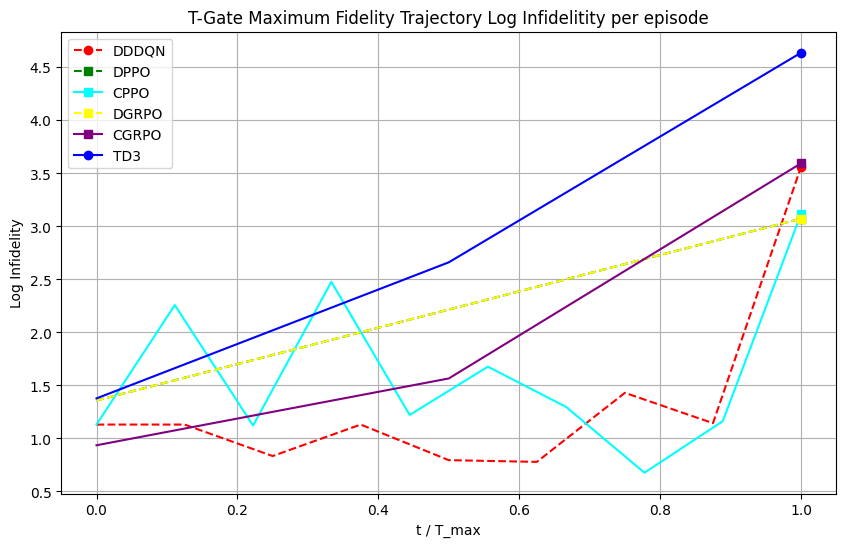

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(
    np.linspace(0, 1, len(t_log_inf_ep_dddqn_max)),
    t_log_inf_ep_dddqn_max,
    label="DDDQN",
    color="red",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(t_log_inf_ep_dppo_max)),
    t_log_inf_ep_dppo_max,
    label="DPPO",
    color="green",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(t_log_inf_ep_cppo_max)),
    t_log_inf_ep_cppo_max,
    label="CPPO",
    color="cyan",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(t_log_inf_ep_dgrpo_max)),
    t_log_inf_ep_dgrpo_max,
    label="DGRPO",
    color="yellow",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(t_log_inf_ep_cgrpo_max)),
    t_log_inf_ep_cgrpo_max,
    label="CGRPO",
    color="purple",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(t_log_inf_ep_td3_max)),
    t_log_inf_ep_td3_max,
    label="TD3",
    color="blue",
    marker="o",
    markevery=[-1],
)
plt.xlabel(f"t / T_max")
plt.ylabel("Log Infidelity")
plt.title("T-Gate Maximum Fidelity Trajectory Log Infidelitity per episode")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Max_Fidelity_Trajectory_Log_Infidelity.png",
)
plt.show()

In [23]:
# Apply the function to the column
t_dddqn_pulse_max =  ast.literal_eval(t_dddqn_trajectories[t_max_t_dddqn][6])
t_dddqn_pulse_max = {
    "omega": [d["omega"] for d in t_dddqn_pulse_max],
    "delta": [d["delta"] for d in t_dddqn_pulse_max],
}

In [24]:
t_dppo_pulse_max = ast.literal_eval(t_dppo_trajectories[t_max_t_dppo][6])
t_dppo_pulse_max = {
    "omega": [d["omega"] for d in t_dppo_pulse_max],
    "delta": [d["delta"] for d in t_dppo_pulse_max],
}

In [25]:
t_cppo_pulse_max = ast.literal_eval(t_cppo_trajectories[t_max_t_cppo][6])
t_cppo_pulse_max = {
    "omega": [d["omega"] for d in t_cppo_pulse_max],
    "delta": [d["delta"] for d in t_cppo_pulse_max],
}

In [26]:
t_dgrpo_pulse_max = ast.literal_eval(t_dgrpo_trajectories[t_max_t_dgrpo][6])
t_dgrpo_pulse_max = {
    "omega": [d["omega"] for d in t_dgrpo_pulse_max],
    "delta": [d["delta"] for d in t_dgrpo_pulse_max],
}

In [27]:
t_cgrpo_pulse_max = ast.literal_eval(t_cgrpo_trajectories[t_max_t_cgrpo][6])
t_cgrpo_pulse_max = {
    "omega": [d["omega"] for d in t_cgrpo_pulse_max],
    "delta": [d["delta"] for d in t_cgrpo_pulse_max],
}

In [28]:
t_td3_pulse_max = ast.literal_eval(t_cgrpo_trajectories[t_max_t_td3][6])
t_td3_pulse_max = {
    "omega": [d["omega"] for d in t_td3_pulse_max],
    "delta": [d["delta"] for d in t_td3_pulse_max],
}

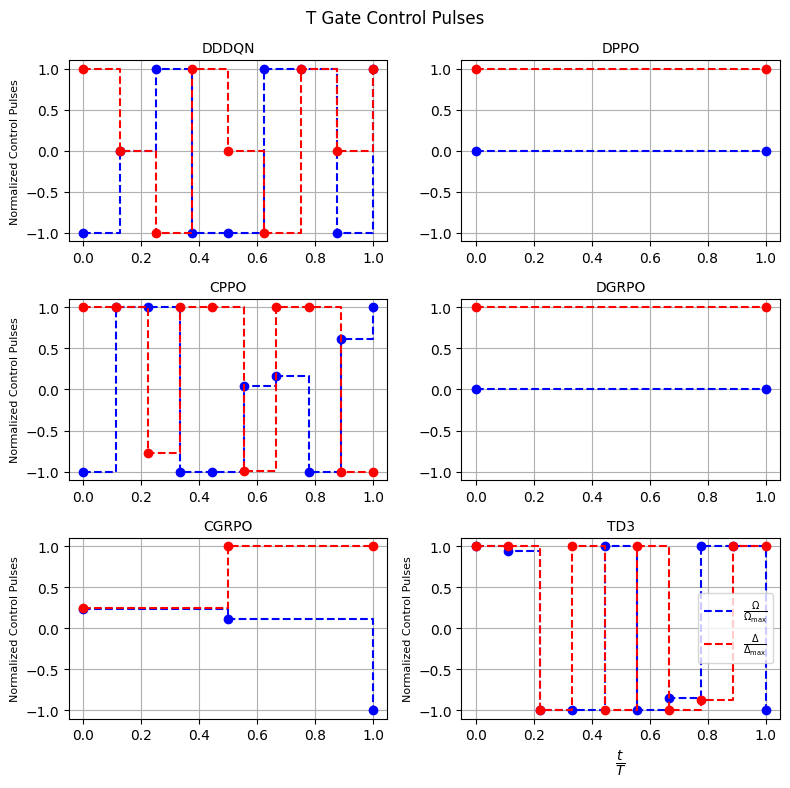

In [29]:
plt.figure(figsize=(8, 8))
plt.suptitle('T Gate Control Pulses')
plt.subplot(3, 2, 1)
plot_control_pulse(
    t_dddqn_pulse_max["omega"],
    t_dddqn_pulse_max["delta"],
    "T",
    "DDDQN",
    smoothing_method="none",
    pulse="max",
)
plt.ylabel("Normalized Control Pulses", fontsize=8)
plt.subplot(3, 2, 2)
plot_control_pulse(
    t_dppo_pulse_max["omega"],
    t_dppo_pulse_max["delta"],
    "T",
    "DPPO",
    smoothing_method="none",
    pulse="max",
)
plt.subplot(3, 2, 3)
plot_control_pulse(
    t_cppo_pulse_max["omega"],
    t_cppo_pulse_max["delta"],
    "T",
    "CPPO",
    smoothing_method="none",
    pulse="max",
)
plt.ylabel("Normalized Control Pulses", fontsize=8)
plt.subplot(3, 2, 4)
plot_control_pulse(
    t_dgrpo_pulse_max["omega"],
    t_dgrpo_pulse_max["delta"],
    "T",
    "DGRPO",
    smoothing_method="none",
    pulse="max",
)
plt.subplot(3, 2, 5)
plot_control_pulse(
    t_cgrpo_pulse_max["omega"],
    t_cgrpo_pulse_max["delta"],
    "T",
    "CGRPO",
    smoothing_method="none",
    pulse="max",
)
plt.ylabel("Normalized Control Pulses", fontsize=8)
plt.subplot(3, 2, 6)
plot_control_pulse(
    t_td3_pulse_max["omega"],
    t_td3_pulse_max["delta"],
    "T",
    "TD3",
    smoothing_method="none",
    pulse="max",
)
plt.ylabel("Normalized Control Pulses", fontsize=8)
plt.xlabel(r"$\frac{t}{T}$", fontsize=14)
omega_line = mlines.Line2D(
    [],
    [],
    color="blue",
    linestyle="--",
    label=r"$\frac{\Omega}{\Omega_{\mathrm{max}}}$",
)
delta_line = mlines.Line2D(
    [],
    [],
    color="red",
    linestyle="--",
    label=r"$\frac{\Delta}{\Delta_{\mathrm{max}}}$",
)
plt.legend(handles=[omega_line, delta_line], fontsize=10)
plt.tight_layout()
plt.savefig(
    f"/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Control_Pulses_All.png",
    dpi=300,
)

# CNOT

In [30]:
cnot_dddqn = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv"
)
cnot_dddqn_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_CNOT_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv"
)
cnot_dppo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_PPO_pulse_Discrete.csv"
)
cnot_dppo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_CNOT_hamiltonian_Field_agent_PPO_pulse_Discrete.csv"
)
cnot_cppo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_PPO_pulse_Continuous.csv"
)
cnot_cppo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_CNOT_hamiltonian_Field_agent_PPO_pulse_Continuous.csv"
)
cnot_dgrpo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_GP_pulse_Discrete.csv"
)
cnot_dgrpo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_CNOT_hamiltonian_Field_agent_GP_pulse_Discrete.csv"
)
cnot_cgrpo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_GP_pulse_Continuous.csv"
)
cnot_cgrpo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_CNOT_hamiltonian_Field_agent_GP_pulse_Continuous.csv"
)
cnot_td3 = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_TD3_pulse_Continuous.csv"
)
cnot_td3_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_CNOT_hamiltonian_Field_agent_TD3_pulse_Continuous.csv"
)

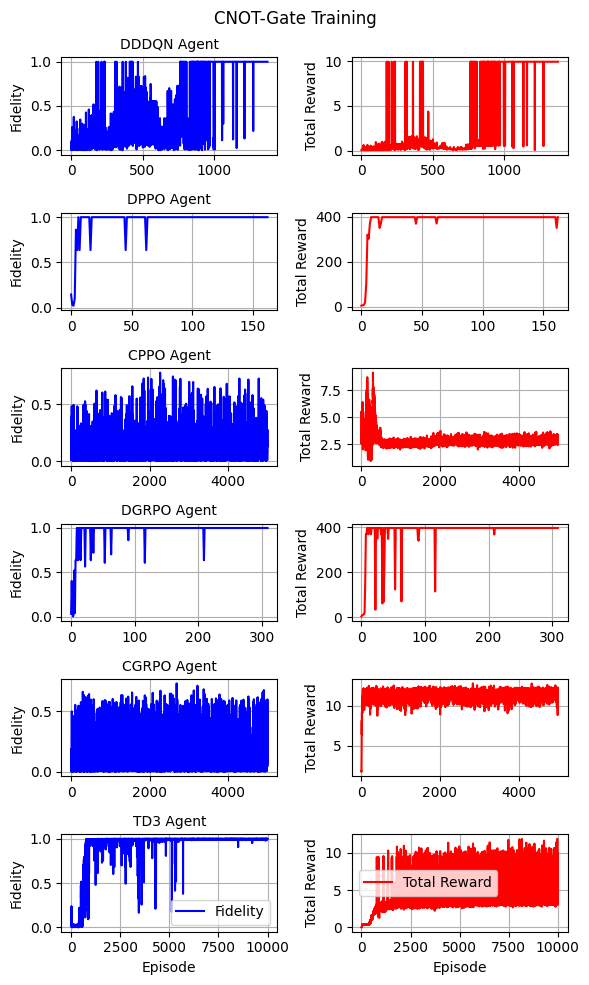

In [31]:
plt.figure(figsize=(6, 10))
plt.suptitle("CNOT-Gate Training", fontsize=12)
plt.subplot(6, 2, 1)
plt.title("DDDQN Agent", fontsize=10)
plt.plot(cnot_dddqn["episode"], cnot_dddqn["fidelity"], color="blue", label="Fidelity")
plt.ylabel("Fidelity")
plt.grid()
plt.subplot(6, 2, 2)
plt.plot(cnot_dddqn["episode"], cnot_dddqn["total_reward"], color="red", label="Total Reward")
plt.ylabel("Total Reward")
plt.grid()
plt.subplot(6, 2, 3)
plt.title("DPPO Agent", fontsize=10)
plt.plot(cnot_dppo["episode"], cnot_dppo["fidelity"], color="blue", label="Fidelity")
plt.ylabel("Fidelity")
plt.grid()
plt.subplot(6, 2, 4)
plt.plot(cnot_dppo["episode"], cnot_dppo["total_reward"], color="red", label="Total Reward")
plt.ylabel("Total Reward")
plt.grid()
plt.subplot(6, 2, 5)
plt.title("CPPO Agent", fontsize=10)
plt.plot(cnot_cppo["episode"], cnot_cppo["fidelity"], color="blue", label="Fidelity")
plt.ylabel("Fidelity")
plt.grid()
plt.subplot(6, 2, 6)
plt.plot(cnot_cppo["episode"], cnot_cppo["total_reward"], color="red", label="Total Reward")
plt.ylabel("Total Reward")
plt.grid()
plt.subplot(6, 2, 7)
plt.title("DGRPO Agent", fontsize=10)
plt.plot(cnot_dgrpo["episode"], cnot_dgrpo["fidelity"], color="blue", label="Fidelity")
plt.ylabel("Fidelity")
plt.grid()
plt.subplot(6, 2, 8)
plt.plot(cnot_dgrpo["episode"], cnot_dgrpo["total_reward"], color="red", label="Total Reward")
plt.ylabel("Total Reward")
plt.grid()
plt.subplot(6, 2, 9)
plt.title("CGRPO Agent", fontsize=10)
plt.plot(cnot_cgrpo["episode"], cnot_cgrpo["fidelity"], color="blue", label="Fidelity")
plt.ylabel("Fidelity")
plt.grid()
plt.subplot(6, 2, 10)
plt.plot(cnot_cgrpo["episode"], cnot_cgrpo["total_reward"], color="red", label="Total Reward")
plt.ylabel("Total Reward")
plt.grid()
plt.subplot(6, 2, 11)
plt.title("TD3 Agent", fontsize=10)
plt.plot(cnot_td3["episode"], cnot_td3["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(6, 2, 12)
plt.plot(cnot_td3["episode"], cnot_td3["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Fidelity_Reward_All.png", dpi=300
)
plt.show()

In [32]:
cnot_max = pd.DataFrame(
    {
        "Agent": ["DDDQN", "PPO-D", "PPO-C", "GRPO-D", "GRPO-C", "TD3"],
        "Max Fidelity": [
            cnot_dddqn["fidelity"].max(),
            cnot_dppo["fidelity"].max(),
            cnot_cppo["fidelity"].max(),
            cnot_dgrpo["fidelity"].max(),
            cnot_cgrpo["fidelity"].max(),
            cnot_td3["fidelity"].max(),
        ],
        "Max Log Infidelity": [
            cnot_dddqn["log_infidelity"].max(),
            cnot_dppo["log_infidelity"].max(),
            cnot_cppo["log_infidelity"].max(),
            cnot_dgrpo["log_infidelity"].max(),
            cnot_cgrpo["log_infidelity"].max(),
            cnot_td3["log_infidelity"].max(),
        ],
        "Avg Fidelity": [
            cnot_dddqn["avg_fidelity"].max(),
            cnot_dppo["avg_fidelity"].max(),
            cnot_cppo["avg_fidelity"].max(),
            cnot_dgrpo["avg_fidelity"].max(),
            cnot_cgrpo["avg_fidelity"].max(),
            cnot_td3["avg_fidelity"].max(),
        ],
        "Time Steps": [
            cnot_dddqn["time_step"][cnot_dddqn["fidelity"].idxmax()],
            cnot_dppo["time_step"][cnot_dppo["fidelity"].idxmax()],
            cnot_cppo["time_step"][cnot_cppo["fidelity"].idxmax()],
            cnot_dgrpo["time_step"][cnot_dgrpo["fidelity"].idxmax()],
            cnot_cgrpo["time_step"][cnot_cgrpo["fidelity"].idxmax()],
            cnot_td3["time_step"][cnot_td3["fidelity"].idxmax()],
        ],
    }
)
cnot_max_sorted = cnot_max.sort_values(by="Max Log Infidelity", ascending=True)
cnot_max_sorted.to_latex(
    "/home/pdconte/Desktop/DUTh_Thesis/Tables/CNOT_Gate_Max_Values.tex"
)
cnot_max_sorted

,Agent,Max Fidelity,Max Log Infidelity,Avg Fidelity,Time Steps
4,GRPO-C,0.730429,0.569327,0.784343,5
2,PPO-C,0.780537,0.658638,0.824429,5
0,DDDQN,0.999361,3.194187,0.999488,2
1,PPO-D,0.999361,3.194187,0.999488,2
3,GRPO-D,0.999361,3.194187,0.999488,2
5,TD3,0.999860,3.852707,0.999888,4


In [33]:
# get the 100 rolling mean of log_infidelity, for the first 100 put 0
cnot_dddqn["log_infidelity_100"] = cnot_dddqn["log_infidelity"].rolling(100).mean()
cnot_dddqn["log_infidelity_100"] = cnot_dddqn["log_infidelity_100"].fillna(0)

cnot_dppo["log_infidelity_100"] = cnot_dppo["log_infidelity"].rolling(100).mean()
cnot_dppo["log_infidelity_100"] = cnot_dppo["log_infidelity_100"].fillna(0)

cnot_cppo["log_infidelity_100"] = cnot_cppo["log_infidelity"].rolling(100).mean()
cnot_cppo["log_infidelity_100"] = cnot_cppo["log_infidelity_100"].fillna(0)

cnot_dgrpo["log_infidelity_100"] = cnot_dgrpo["log_infidelity"].rolling(100).mean()
cnot_dgrpo["log_infidelity_100"] = cnot_dgrpo["log_infidelity_100"].fillna(0)

cnot_cgrpo["log_infidelity_100"] = cnot_cgrpo["log_infidelity"].rolling(100).mean()
cnot_cgrpo["log_infidelity_100"] = cnot_cgrpo["log_infidelity_100"].fillna(0)

cnot_td3["log_infidelity_100"] = cnot_td3["log_infidelity"].rolling(100).mean()
cnot_td3["log_infidelity_100"] = cnot_td3["log_infidelity_100"].fillna(0)

In [34]:
t_max_cnot_dddqn = f"{cnot_dddqn['fidelity'].idxmax()}"
t_max_cnot_dppo = f"{cnot_dppo['fidelity'].idxmax()}"
t_max_cnot_cppo = f"{cnot_cppo['fidelity'].idxmax()}"
t_max_cnot_dgrpo = f"{cnot_dgrpo['fidelity'].idxmax()}"
t_max_cnot_cgrpo = f"{cnot_cgrpo['fidelity'].idxmax()}"
t_max_cnot_td3 = f"{cnot_td3['fidelity'].idxmax()}"
cnot_log_inf_ep_dddqn_max = pd.DataFrame(
    ast.literal_eval(cnot_dddqn_trajectories[t_max_cnot_dddqn][3])
)
cnot_log_inf_ep_dppo_max = pd.DataFrame(
    ast.literal_eval(cnot_dppo_trajectories[t_max_cnot_dppo][3])
)
cnot_log_inf_ep_cppo_max = pd.DataFrame(
    ast.literal_eval(cnot_cppo_trajectories[t_max_cnot_cppo][3])
)
cnot_log_inf_ep_dgrpo_max = pd.DataFrame(
    ast.literal_eval(cnot_dgrpo_trajectories[t_max_cnot_dgrpo][3])
)
cnot_log_inf_ep_cgrpo_max = pd.DataFrame(
    ast.literal_eval(cnot_cgrpo_trajectories[t_max_cnot_cgrpo][3])
)
cnot_log_inf_ep_td3_max = pd.DataFrame(
    ast.literal_eval(cnot_td3_trajectories[t_max_cnot_td3][3])
)

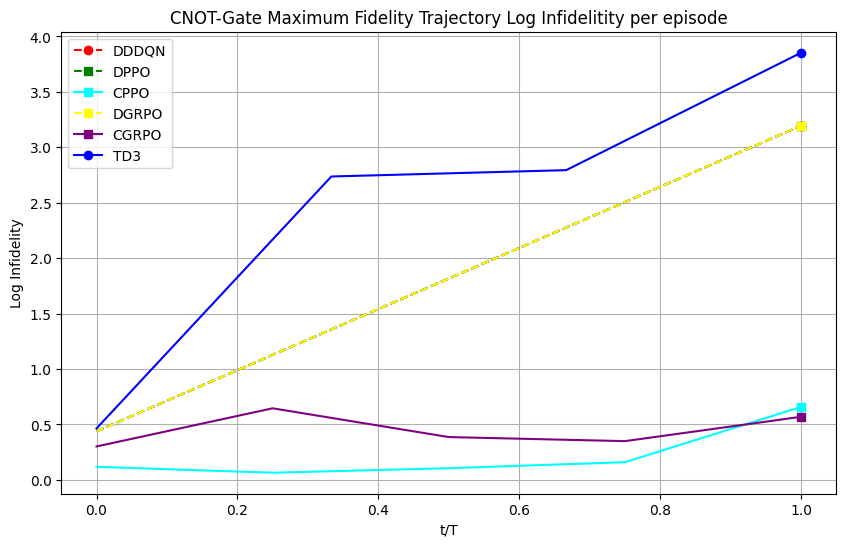

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(
    np.linspace(0, 1, len(cnot_log_inf_ep_dddqn_max)),
    cnot_log_inf_ep_dddqn_max,
    label="DDDQN",
    color="red",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(cnot_log_inf_ep_dppo_max)),
    cnot_log_inf_ep_dppo_max,
    label="DPPO",
    color="green",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(cnot_log_inf_ep_cppo_max)),
    cnot_log_inf_ep_cppo_max,
    label="CPPO",
    color="cyan",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(cnot_log_inf_ep_dgrpo_max)),
    cnot_log_inf_ep_dgrpo_max,
    label="DGRPO",
    color="yellow",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(cnot_log_inf_ep_cgrpo_max)),
    cnot_log_inf_ep_cgrpo_max,
    label="CGRPO",
    color="purple",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(cnot_log_inf_ep_td3_max)),
    cnot_log_inf_ep_td3_max,
    label="TD3",
    color="blue",
    marker="o",
    markevery=[-1],
)
plt.xlabel(f"t/T")
plt.ylabel("Log Infidelity")
plt.title("CNOT-Gate Maximum Fidelity Trajectory Log Infidelitity per episode")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Max_Fidelity_Trajectory_Log_Infidelity.png",
)
plt.show()

In [36]:
def plot_control_pulse_two_qubit(
    control_rabi,
    control_detuning,
    target_rabi,
    target_detuning,
    coupling_strength,
    gate,
    agent_type,
    smoothing_method="none",
    **kwargs,
):

    num_steps = len(control_rabi)
    assert (
        len(control_detuning) == num_steps
        and len(target_rabi) == num_steps
        and len(target_detuning) == num_steps
    ), "All control and target arrays must have the same length."

    # Handle coupling_strength: if scalar, convert to an array; if array, check length.
    if np.isscalar(coupling_strength):
        coupling_strength = np.full(num_steps, coupling_strength)
    else:
        assert (
            len(coupling_strength) == num_steps
        ), "Coupling strength array must have the same length as the qubit pulse arrays."

    t_normalized = np.linspace(0, 1, num_steps)

    # Normalize arrays
    control_rabi_normalized = _normalize_array(control_rabi, "Control Rabi")
    control_detuning_normalized = _normalize_array(control_detuning, "Control Detuning")
    target_rabi_normalized = _normalize_array(target_rabi, "Target Rabi")
    target_detuning_normalized = _normalize_array(target_detuning, "Target Detuning")
    coupling_strength_normalized = _normalize_array(
        coupling_strength, "Coupling Strength"
    )

    # Apply smoothing if requested
    if smoothing_method == "cubic_spline":
        control_rabi_normalized, t_normalized = _smooth_array(
            control_rabi_normalized, smoothing_method, t_normalized, **kwargs
        )
        control_detuning_normalized, t_normalized = _smooth_array(
            control_detuning_normalized, smoothing_method, t_normalized, **kwargs
        )
        target_rabi_normalized, t_normalized = _smooth_array(
            target_rabi_normalized, smoothing_method, t_normalized, **kwargs
        )
        target_detuning_normalized, t_normalized = _smooth_array(
            target_detuning_normalized, smoothing_method, t_normalized, **kwargs
        )
        coupling_strength_normalized, t_normalized = _smooth_array(
            coupling_strength_normalized, smoothing_method, t_normalized, **kwargs
        )
    else:
        control_rabi_normalized = _smooth_array(
            control_rabi_normalized, smoothing_method, **kwargs
        )
        control_detuning_normalized = _smooth_array(
            control_detuning_normalized, smoothing_method, **kwargs
        )
        target_rabi_normalized = _smooth_array(
            target_rabi_normalized, smoothing_method, **kwargs
        )
        target_detuning_normalized = _smooth_array(
            target_detuning_normalized, smoothing_method, **kwargs
        )
        coupling_strength_normalized = _smooth_array(
            coupling_strength_normalized, smoothing_method, **kwargs
        )

    # Create three subplots: one for control qubit, one for target qubit, and one for coupling strength
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(
        f"{agent_type} {gate} Gate Control Pulses",
        fontsize=14,
    )

    # Plot for Control Qubit
    ax[0].plot(
        t_normalized,
        control_rabi_normalized,
        label=r"$\frac{\Omega_{c}}{\Omega_{c,\mathrm{max}}}$",
        color="blue",
        linestyle="--",
        drawstyle="steps-post",
        marker="o",
    )
    ax[0].plot(
        t_normalized,
        control_detuning_normalized,
        label=r"$\frac{\Delta_{c}}{\Delta_{c,\mathrm{max}}}$",
        color="red",
        linestyle="--",
        drawstyle="steps-post",
        marker="o",
    )
    ax[0].set_ylabel("Normalized Pulses", fontsize=8)
    ax[0].set_ylim(-1.1, 1.1)
    ax[0].set_title("Control Qubit Pulses", fontsize=10)
    ax[0].grid(True)

    # Plot for Target Qubit
    ax[1].plot(
        t_normalized,
        target_rabi_normalized,
        label=r"$\frac{\Omega_{t}}{\Omega_{t,\mathrm{max}}}$",
        color="green",
        linestyle="--",
        drawstyle="steps-post",
        marker="o",
    )
    ax[1].plot(
        t_normalized,
        target_detuning_normalized,
        label=r"$\frac{\Delta_{t}}{\Delta_{t,\mathrm{max}}}$",
        color="orange",
        linestyle="--",
        drawstyle="steps-post",
        marker="o",
    )
    ax[1].set_ylim(-1.1, 1.1)
    ax[1].set_title("Target Qubit Pulses", fontsize=10)
    ax[1].grid(True)

    # Plot for Coupling Strength
    ax[2].plot(
        t_normalized,
        coupling_strength_normalized,
        label=r"$\frac{J_{zx}}{J_{zx,\mathrm{max}}}$",
        color="purple",
        linestyle="-",
        drawstyle="steps-post",
        marker="o",
    )
    ax[2].set_ylim(-1.1, 1.1)
    ax[2].set_title("Coupling Strength (J_{zx})", fontsize=10)
    ax[2].grid(True)
    plt.tight_layout()

    # Overall title including coupling strength information

    # plt.savefig(
    #     f"/home/pdconte/Desktop/DUTh_Thesis/Plots/{gate}_Gate_Control_{agent_type}.png",
    #     dpi=300,
    # )
    # plt.show()

In [37]:
# Apply the function to the column
cnot_dddqn_pulse = ast.literal_eval(cnot_dddqn_trajectories[t_max_cnot_dddqn][6])
cnot_dddqn_pulse = {
    "omega1": [d["omega1"] for d in cnot_dddqn_pulse],
    "delta1": [d["delta1"] for d in cnot_dddqn_pulse],
    "omega2": [d["omega2"] for d in cnot_dddqn_pulse],
    "delta2": [d["delta2"] for d in cnot_dddqn_pulse],
    "coupling_strength_zx": [d["coupling_strength_zx"] for d in cnot_dddqn_pulse],
}

In [38]:
# Apply the function to the column
cnot_dppo_pulse = ast.literal_eval(cnot_dppo_trajectories[t_max_cnot_dppo][6])
cnot_dppo_pulse = {
    "omega1": [d["omega1"] for d in cnot_dppo_pulse],
    "delta1": [d["delta1"] for d in cnot_dppo_pulse],
    "omega2": [d["omega2"] for d in cnot_dppo_pulse],
    "delta2": [d["delta2"] for d in cnot_dppo_pulse],
    "coupling_strength_zx": [d["coupling_strength_zx"] for d in cnot_dppo_pulse],
}

In [39]:
# Apply the function to the column
cnot_cppo_pulse = ast.literal_eval(cnot_cppo_trajectories[t_max_cnot_cppo][6])
cnot_cppo_pulse = {
    "omega1": [d["omega1"] for d in cnot_cppo_pulse],
    "delta1": [d["delta1"] for d in cnot_cppo_pulse],
    "omega2": [d["omega2"] for d in cnot_cppo_pulse],
    "delta2": [d["delta2"] for d in cnot_cppo_pulse],
    "coupling_strength_zx": [d["coupling_strength_zx"] for d in cnot_cppo_pulse],
}

In [40]:
# Apply the function to the column
cnot_dgrpo_pulse = ast.literal_eval(cnot_dgrpo_trajectories[t_max_cnot_dgrpo][6])
cnot_dgrpo_pulse = {
    "omega1": [d["omega1"] for d in cnot_dgrpo_pulse],
    "delta1": [d["delta1"] for d in cnot_dgrpo_pulse],
    "omega2": [d["omega2"] for d in cnot_dgrpo_pulse],
    "delta2": [d["delta2"] for d in cnot_dgrpo_pulse],
    "coupling_strength_zx": [d["coupling_strength_zx"] for d in cnot_dgrpo_pulse],
}

In [41]:
cnot_cgrpo_pulse = ast.literal_eval(cnot_cgrpo_trajectories[t_max_cnot_cgrpo][6])
cnot_cgrpo_pulse = {
    "omega1": [d["omega1"] for d in cnot_cgrpo_pulse],
    "delta1": [d["delta1"] for d in cnot_cgrpo_pulse],
    "omega2": [d["omega2"] for d in cnot_cgrpo_pulse],
    "delta2": [d["delta2"] for d in cnot_cgrpo_pulse],
    "coupling_strength_zx": [d["coupling_strength_zx"] for d in cnot_cgrpo_pulse],
}

In [42]:
cnot_td3_pulse = ast.literal_eval(cnot_td3_trajectories[t_max_cnot_td3][6])
cnot_td3_pulse = {
    "omega1": [d["omega1"] for d in cnot_td3_pulse],
    "delta1": [d["delta1"] for d in cnot_td3_pulse],
    "omega2": [d["omega2"] for d in cnot_td3_pulse],
    "delta2": [d["delta2"] for d in cnot_td3_pulse],
    "coupling_strength_zx": [d["coupling_strength_zx"] for d in cnot_td3_pulse],
}

In [43]:
def plot_control_pulse_two_qubit_axes(
    control_rabi,
    control_detuning,
    target_rabi,
    target_detuning,
    coupling_strength,
    gate,
    agent_type,
    axes,  # expect an array of 3 matplotlib Axes objects (a single row)
    smoothing_method="none",
    **kwargs,
):
    num_steps = len(control_rabi)
    assert (
        len(control_detuning) == num_steps
        and len(target_rabi) == num_steps
        and len(target_detuning) == num_steps
    ), "All control and target arrays must have the same length."

    # Convert coupling_strength to array if necessary.
    if np.isscalar(coupling_strength):
        coupling_strength = np.full(num_steps, coupling_strength)
    else:
        assert (
            len(coupling_strength) == num_steps
        ), "Coupling strength array must have the same length as the pulse arrays."

    t_normalized = np.linspace(0, 1, num_steps)

    # Normalize the arrays.
    control_rabi_norm = _normalize_array(control_rabi, "Control Rabi")
    control_detuning_norm = _normalize_array(control_detuning, "Control Detuning")
    target_rabi_norm = _normalize_array(target_rabi, "Target Rabi")
    target_detuning_norm = _normalize_array(target_detuning, "Target Detuning")
    coupling_strength_norm = _normalize_array(coupling_strength, "Coupling Strength")

    # Optionally apply smoothing.
    if smoothing_method == "cubic_spline":
        control_rabi_norm, t_normalized = _smooth_array(
            control_rabi_norm, smoothing_method, t_normalized, **kwargs
        )
        control_detuning_norm, t_normalized = _smooth_array(
            control_detuning_norm, smoothing_method, t_normalized, **kwargs
        )
        target_rabi_norm, t_normalized = _smooth_array(
            target_rabi_norm, smoothing_method, t_normalized, **kwargs
        )
        target_detuning_norm, t_normalized = _smooth_array(
            target_detuning_norm, smoothing_method, t_normalized, **kwargs
        )
        coupling_strength_norm, t_normalized = _smooth_array(
            coupling_strength_norm, smoothing_method, t_normalized, **kwargs
        )
    else:
        control_rabi_norm = _smooth_array(control_rabi_norm, smoothing_method, **kwargs)
        control_detuning_norm = _smooth_array(
            control_detuning_norm, smoothing_method, **kwargs
        )
        target_rabi_norm = _smooth_array(target_rabi_norm, smoothing_method, **kwargs)
        target_detuning_norm = _smooth_array(
            target_detuning_norm, smoothing_method, **kwargs
        )
        coupling_strength_norm = _smooth_array(
            coupling_strength_norm, smoothing_method, **kwargs
        )

    # --- Plotting on the provided axes ---
    # Control Qubit Pulses.
    axes[0].plot(
        t_normalized,
        control_rabi_norm,
        label=r"$\frac{\Omega_{c}}{\Omega_{c,\mathrm{max}}}$",
        color="blue",
        linestyle="--",
        drawstyle="steps-post",
        marker="o",
    )
    axes[0].plot(
        t_normalized,
        control_detuning_norm,
        label=r"$\frac{\Delta_{c}}{\Delta_{c,\mathrm{max}}}$",
        color="red",
        linestyle="--",
        drawstyle="steps-post",
        marker="o",
    )
    axes[0].set_ylabel("Normalized Pulses", fontsize=12)
    axes[0].set_ylim(-1.1, 1.1)
    axes[0].set_title(f"{agent_name} Control Qubit Pulses", fontsize=12)
    axes[0].grid(True)


    # Target Qubit Pulses.
    axes[1].plot(
        t_normalized,
        target_rabi_norm,
        label=r"$\frac{\Omega_{t}}{\Omega_{t,\mathrm{max}}}$",
        color="green",
        linestyle="--",
        drawstyle="steps-post",
        marker="o",
    )
    axes[1].plot(
        t_normalized,
        target_detuning_norm,
        label=r"$\frac{\Delta_{t}}{\Delta_{t,\mathrm{max}}}$",
        color="orange",
        linestyle="--",
        drawstyle="steps-post",
        marker="o",
    )
    axes[1].set_ylim(-1.1, 1.1)
    axes[1].set_title("Target Qubit Pulses", fontsize=12)
    axes[1].grid(True)

    # Coupling Strength.
    axes[2].plot(
        t_normalized,
        coupling_strength_norm,
        label=r"$\frac{J_{zx}}{J_{zx,\mathrm{max}}}$",
        color="purple",
        linestyle="-",
        drawstyle="steps-post",
        marker="o",
    )
    axes[2].set_ylim(-1.1, 1.1)
    axes[2].set_title(r"Coupling Strength ($J_{zx}$)", fontsize=12)
    axes[2].grid(True)

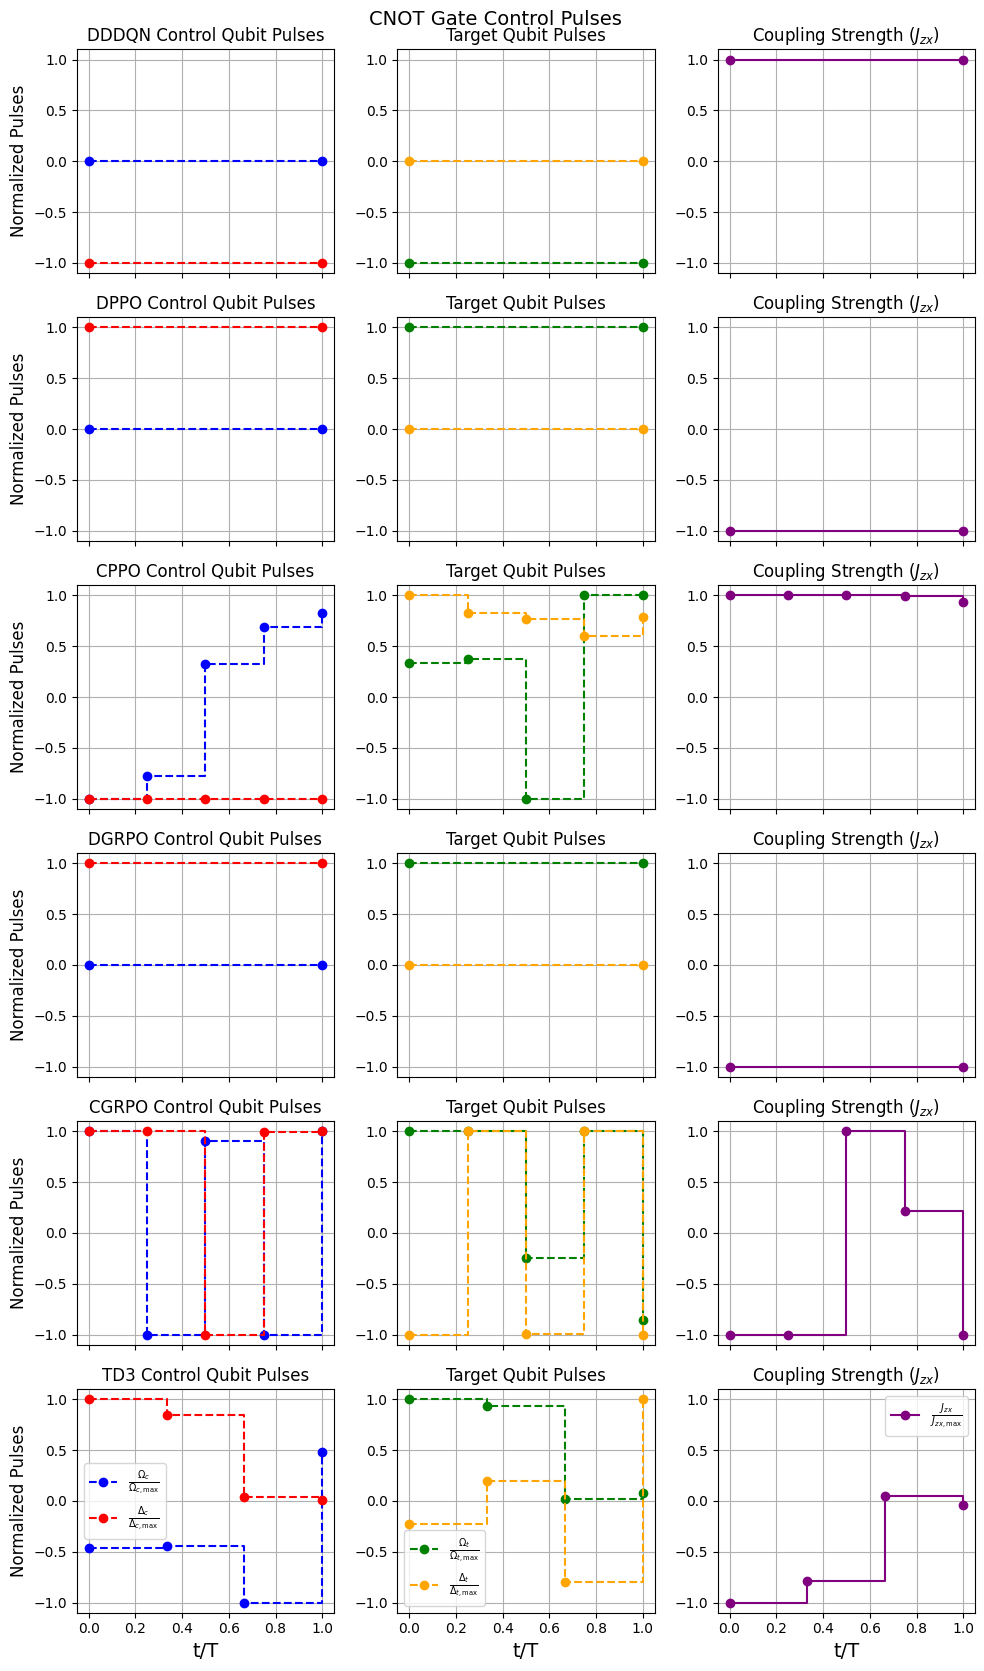

In [45]:
fig, axs = plt.subplots(6, 3, figsize=(10, 17), sharex=True)
fig.suptitle("CNOT Gate Control Pulses", fontsize=14)

# Create a list of your agent pulse dictionaries and corresponding agent names.
agent_pulse_data = [
    (cnot_dddqn_pulse, "DDDQN"),
    (cnot_dppo_pulse, "DPPO"),
    (cnot_cppo_pulse, "CPPO"),
    (cnot_dgrpo_pulse, "DGRPO"),
    (cnot_cgrpo_pulse, "CGRPO"),
    (cnot_td3_pulse, "TD3"),
]

# Loop through each agent (row) and call the plotting function.
for i, (pulse_data, agent_name) in enumerate(agent_pulse_data):
    plot_control_pulse_two_qubit_axes(
        pulse_data["omega1"],
        pulse_data["delta1"],
        pulse_data["omega2"],
        pulse_data["delta2"],
        pulse_data["coupling_strength_zx"],
        "CNOT",
        agent_name,
        axes=axs[i, :],
        smoothing_method="none",
    )

    # Add a vertical annotation on the left of the row to label the agent.
    # axs[i, 0].annotate(
    #     f"{agent_name}",
    #     xy=(-0.25, 0.5),
    #     xycoords="axes fraction",
    #     fontsize=12,
    #     ha="right",
    #     va="center",
    #     rotation=90,
    #     bbox=dict(boxstyle="round", fc="w", alpha=0.5),
    # )
    if i == 5:
        axs[i, 0].set_xlabel("t/T", fontsize=14)
        axs[i, 1].set_xlabel("t/T", fontsize=14)
        axs[i, 2].set_xlabel("t/T", fontsize=14)
        axs[i, 0].legend()
        axs[i, 1].legend()
        axs[i, 2].legend()

# Set a common x-axis label for all subplots.
# fig.supxlabel("Normalized Time", fontsize=14)

plt.tight_layout()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Control_Pulses_All.png",
)
plt.show()

# Comparison of Control Pulses

In [ ]:
# import from ./Data/ the crab and grape methods for the gates

h_grape_adam = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_h_adam.csv')
h_grape_lbfgs = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_h_lbfgs.csv')
h_crab = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/crab_h.csv')

t_grape_adam = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_t_adam.csv')
t_grape_lbfgs = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_t_lbfgs.csv')
t_crab = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/crab_t.csv')

cnot_grape_adam = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_cnot_adam.csv')
cnot_grape_lbfgs = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_cnot_lbfgs.csv')
cnot_crab = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/crab_cnot.csv')

: 

In [ ]:
h_grape_adam.isin([-np.inf]).sum()

Unnamed: 0           0
loss_grape_h_adam    0
fid_grape_h_adam     0
inf_grape_h_adam     0
dtype: int64

: 

In [ ]:
h_grape_lbfgs.isin([-np.inf]).sum()

Unnamed: 0             0
loss_grape_h_lbfgs     0
fid_grape_h_lbfgs      0
inf_grape_h_lbfgs     63
dtype: int64

: 

In [ ]:
h_grape_lbfgs.replace([-np.inf], np.nan, inplace=True)
h_grape_lbfgs.ffill(inplace=True)

: 

In [ ]:
h_crab.isin([-np.inf]).sum()

Unnamed: 0       0
loss_crab_h      0
fid_crab_h       0
inf_crab_h     165
dtype: int64

: 

In [ ]:
h_crab.replace([-np.inf], np.nan, inplace=True)
h_crab.ffill(inplace=True)

: 

In [ ]:
h_grape_adam["inf_grape_h_adam_100"] = h_grape_adam["inf_grape_h_adam"].rolling(100).mean()
h_grape_lbfgs["inf_grape_h_lbfgs_100"] = h_grape_lbfgs["inf_grape_h_lbfgs"].rolling(100).mean()
h_crab["inf_crab_h_100"] = h_crab["inf_crab_h"].rolling(100).mean()

: 

In [ ]:
h_grape_adam["inf_grape_h_adam_100"] = h_grape_adam["inf_grape_h_adam_100"].fillna(0)
h_grape_lbfgs["inf_grape_h_lbfgs_100"] = h_grape_lbfgs["inf_grape_h_lbfgs_100"].fillna(
    0
)
h_crab["inf_crab_h_100"] = h_crab["inf_crab_h_100"].fillna(0)

: 

In [ ]:
h_grape_adam.rename(
    columns={"inf_grape_h_adam_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
h_grape_lbfgs.rename(
    columns={"inf_grape_h_lbfgs_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
h_crab.rename(
    columns={"inf_crab_h_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)

: 

In [ ]:
h_grape_adam["log_infidelity_100"] = -h_grape_adam["log_infidelity_100"]
h_grape_lbfgs["log_infidelity_100"] = -h_grape_lbfgs["log_infidelity_100"]
h_crab["log_infidelity_100"] = -h_crab["log_infidelity_100"]

: 

In [ ]:
t_grape_adam.isin([-np.inf]).sum()

Unnamed: 0             0
loss_grape_t_adam      0
fid_grape_t_adam       0
inf_grape_t_adam     355
dtype: int64

: 

In [ ]:
t_grape_adam.replace([-np.inf], np.nan, inplace=True)
t_grape_adam.ffill(inplace=True)

: 

In [ ]:
t_grape_lbfgs.isin([-np.inf]).sum()

Unnamed: 0            0
loss_grape_t_lbfgs    0
fid_grape_t_lbfgs     0
inf_grape_t_lbfgs     0
dtype: int64

: 

In [ ]:
t_crab.isin([-np.inf]).sum()

Unnamed: 0       0
loss_crab_t      0
fid_crab_t       0
inf_crab_t     113
dtype: int64

: 

In [ ]:
t_crab.replace([-np.inf], np.nan, inplace=True)
t_crab.ffill(inplace=True)

: 

In [ ]:
t_grape_adam["inf_grape_t_adam_100"] = t_grape_adam["inf_grape_t_adam"].rolling(100).mean()
t_grape_lbfgs["inf_grape_t_lbfgs_100"] = t_grape_lbfgs["inf_grape_t_lbfgs"].rolling(100).mean()
t_crab["inf_crab_t_100"] = t_crab["inf_crab_t"].rolling(100).mean()

: 

In [ ]:
t_grape_adam["inf_grape_t_adam_100"] = t_grape_adam["inf_grape_t_adam_100"].fillna(0)
t_grape_lbfgs["inf_grape_t_lbfgs_100"] = t_grape_lbfgs["inf_grape_t_lbfgs_100"].fillna(
    0
)
t_crab["inf_crab_t_100"] = t_crab["inf_crab_t_100"].fillna(0)

: 

In [ ]:
t_grape_adam.rename(
    columns={"inf_grape_t_adam_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
t_grape_lbfgs.rename(
    columns={"inf_grape_t_lbfgs_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
t_crab.rename(
    columns={"inf_crab_t_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)


: 

In [ ]:
t_grape_adam["log_infidelity_100"] = -t_grape_adam["log_infidelity_100"]
t_grape_lbfgs["log_infidelity_100"] = -t_grape_lbfgs["log_infidelity_100"]
t_crab["log_infidelity_100"] = -t_crab["log_infidelity_100"]

: 

In [ ]:
cnot_grape_adam.isin([-np.inf]).sum()

Unnamed: 0              0
loss_grape_cnot_adam    0
fid_grape_cnot_adam     0
inf_grape_cnot_adam     0
dtype: int64

: 

In [ ]:
cnot_grape_lbfgs.isin([-np.inf]).sum()

Unnamed: 0               0
loss_grape_cnot_lbfgs    0
fid_grape_cnot_lbfgs     0
inf_grape_cnot_lbfgs     0
dtype: int64

: 

In [ ]:
cnot_crab.isin([-np.inf]).sum()

Unnamed: 0          0
loss_crab_cnot      0
fid_crab_cnot       0
inf_crab_cnot     425
dtype: int64

: 

In [ ]:
cnot_crab.replace([-np.inf], np.nan, inplace=True)
cnot_crab.ffill(inplace=True)

: 

In [ ]:
cnot_grape_adam["inf_grape_cnot_adam_100"] = (
    cnot_grape_adam["inf_grape_cnot_adam"].rolling(100).mean()
)
cnot_grape_lbfgs["inf_grape_cnot_lbfgs_100"] = (
    cnot_grape_lbfgs["inf_grape_cnot_lbfgs"].rolling(100).mean()
)
cnot_crab["inf_crab_cnot_100"] = cnot_crab["inf_crab_cnot"].rolling(100).mean()

: 

In [ ]:
cnot_grape_adam["inf_grape_cnot_adam_100"] = cnot_grape_adam["inf_grape_cnot_adam_100"].fillna(0)
cnot_grape_lbfgs["inf_grape_cnot_lbfgs_100"] = cnot_grape_lbfgs["inf_grape_cnot_lbfgs_100"].fillna(
    0
)
cnot_crab["inf_crab_cnot_100"] = cnot_crab["inf_crab_cnot_100"].fillna(0)

: 

In [ ]:
cnot_grape_adam.rename(
    columns={"inf_grape_cnot_adam_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
cnot_grape_lbfgs.rename(
    columns={"inf_grape_cnot_lbfgs_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
cnot_crab.rename(
    columns={"inf_crab_cnot_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)

: 

In [ ]:
cnot_grape_adam["log_infidelity_100"] = -cnot_grape_adam["log_infidelity_100"]
cnot_grape_lbfgs["log_infidelity_100"] = -cnot_grape_lbfgs["log_infidelity_100"]
cnot_crab["log_infidelity_100"] = -cnot_crab["log_infidelity_100"]

: 

NameError: name 't_dddqn' is not defined

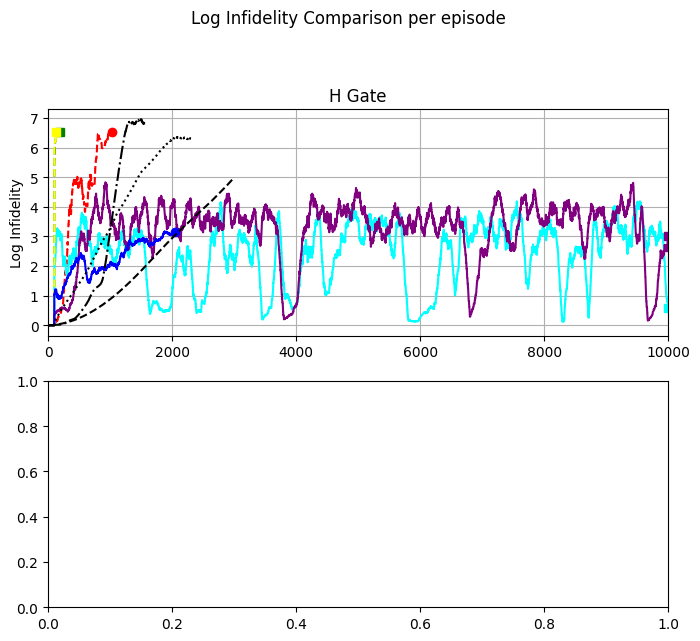

: 

In [ ]:
plt.figure(figsize=(8, 10))
plt.suptitle("Log Infidelity Comparison per episode")
plt.subplot(3, 1, 1)
plt.plot(
    h_dddqn["episode"],
    h_dddqn["log_infidelity_100"],
    label="DDDQN",
    color="red",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    h_dppo["episode"],
    h_dppo["log_infidelity_100"],
    label="DPPO",
    color="green",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    h_cppo["episode"],
    h_cppo["log_infidelity_100"],
    label="CPPO",
    color="cyan",
    marker="s",
    markevery=[-1],
)
plt.plot(
    h_dgrpo["episode"],
    h_dgrpo["log_infidelity_100"],
    label="DGRPO",
    color="yellow",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    h_cgrpo["episode"],
    h_cgrpo["log_infidelity_100"],
    label="CGRPO",
    color="purple",
    marker="s",
    markevery=[-1],
)
plt.plot(
    h_td3["episode"],
    h_td3["log_infidelity_100"],
    label="TD3",
    color="blue",
    marker="o",
    markevery=[-1],
)
plt.plot(
    h_grape_adam["episode"],
    h_grape_adam["log_infidelity_100"],
    label="GRAPE Adam",
    color="black",
    linestyle="dashed",
)
plt.plot(
    h_grape_lbfgs["episode"],
    h_grape_lbfgs["log_infidelity_100"],
    label="GRAPE LBFGS",
    color="black",
    linestyle="dotted",
)
plt.plot(
    h_crab["episode"],
    h_crab["log_infidelity_100"],
    label="CRAB",
    color="black",
    linestyle="dashdot",
)
# plt.xlabel("Episode")
plt.xlim(0, 10000)
plt.ylabel("Log Infidelity")
plt.title("H Gate")
# plt.legend(loc="upper right")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(
    t_dddqn["episode"],
    t_dddqn["log_infidelity_100"],
    label="DDDQN",
    color="red",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    t_dppo["episode"],
    t_dppo["log_infidelity_100"],
    label="Discrete PPO",
    color="green",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    t_cppo["episode"],
    t_cppo["log_infidelity_100"],
    label="Continuous PPO",
    color="cyan",
    marker="s",
    markevery=[-1],
)
plt.plot(
    t_dgrpo["episode"],
    t_dgrpo["log_infidelity_100"],
    label="Discrete GRPO",
    color="yellow",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    t_cgrpo["episode"],
    t_cgrpo["log_infidelity_100"],
    label="Continuous GRPO",
    color="purple",
    marker="s",
    markevery=[-1],
)
plt.plot(
    t_td3["episode"],
    t_td3["log_infidelity_100"],
    label="TD3",
    color="blue",
    marker="o",
    markevery=[-1],
)
plt.plot(
    t_grape_adam["episode"],
    t_grape_adam["log_infidelity_100"],
    label="GRAPE Adam",
    color="black",
    linestyle="dashed",
)
plt.plot(
    t_grape_lbfgs["episode"],
    t_grape_lbfgs["log_infidelity_100"],
    label="GRAPE LBFGS",
    color="black",
    linestyle="dotted",
)
plt.plot(
    t_crab["episode"],
    t_crab["log_infidelity_100"],
    label="CRAB",
    color="black",
    linestyle="dashdot",
)

plt.ylabel("Log Infidelity")
plt.xlim(0, 10000)
plt.title("T Gate")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(
    cnot_dddqn["episode"],
    cnot_dddqn["log_infidelity_100"],
    label="DDDQN",
    color="red",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    cnot_dppo["episode"],
    cnot_dppo["log_infidelity_100"],
    label="DPPO",
    color="green",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    cnot_cppo["episode"],
    cnot_cppo["log_infidelity_100"],
    label="CPPO",
    color="cyan",
    marker="s",
    markevery=[-1],
)
plt.plot(
    cnot_dgrpo["episode"],
    cnot_dgrpo["log_infidelity_100"],
    label="DGRPO",
    color="yellow",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    cnot_cgrpo["episode"],
    cnot_cgrpo["log_infidelity_100"],
    label="CGRPO",
    color="purple",
    marker="s",
    markevery=[-1],
)
plt.plot(
    cnot_td3["episode"],
    cnot_td3["log_infidelity_100"],
    label="TD3",
    color="blue",
    marker="o",
    markevery=[-1],
)
plt.plot(
    cnot_grape_adam["episode"],
    cnot_grape_adam["log_infidelity_100"],
    label="GRAPE Adam",
    color="black",
    linestyle="dashed",
)
plt.plot(
    cnot_grape_lbfgs["episode"],
    cnot_grape_lbfgs["log_infidelity_100"],
    label="GRAPE LBFGS",
    color="black",
    linestyle="dotted",
)
plt.plot(
    cnot_crab["episode"],
    cnot_crab["log_infidelity_100"],
    label="CRAB",
    color="black",
    linestyle="dashdot",
)

plt.xlabel("Episode")
plt.xlim(0, 10000)
plt.ylabel("Log Infidelity")
plt.title("CNOT Gate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/Log_Infidelity_Comparison_All.png",
    dpi=300,
)
plt.show()